<a href="https://colab.research.google.com/github/opi-lab/optical-metrology-2021/blob/gh-pages/notebooks/surface_roughness_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.genfromtxt('standard-3dX.csv', delimiter=',')
Y = np.genfromtxt('standard-3dY.csv', delimiter=',')
Z = np.genfromtxt('standard-3dZ.csv', delimiter=',')

print(Z.shape)

(1024, 1280)


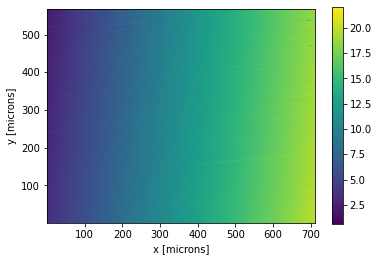

In [ ]:
# plt.imshow(Z)
plt.imshow(Z, extent=[X[0][0], X[0][-1], Y[0][0], Y[-1][0]])
plt.xlabel('x [microns]')
plt.ylabel('y [microns]')
plt.colorbar()
plt.show()

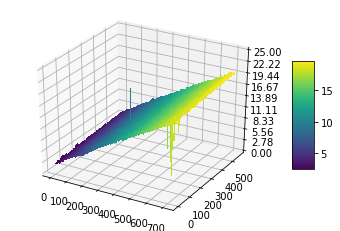

In [ ]:
# import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
# import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [ ]:
# plt.imshow(Y)
# plt.colorbar()
# plt.show()

print(X[0][0])
print(X[0][-1])

print(Y[0][0])
print(Y[-1][0])

# print(Y[1:-1])

0.55556
711.12
0.55556
568.89


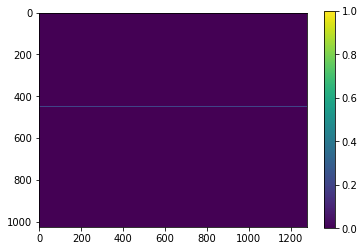

In [ ]:
mask = Y == 250
# print(mask)
plt.imshow(mask)
plt.colorbar()
plt.show()

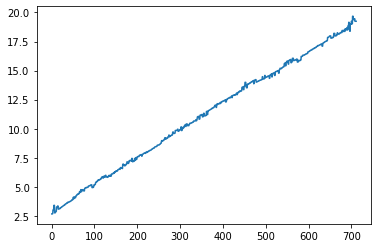

In [ ]:
# extraer perfil

z_250 = Z[mask]
x_250 = X[mask]

plt.plot(x_250, z_250)
plt.show()

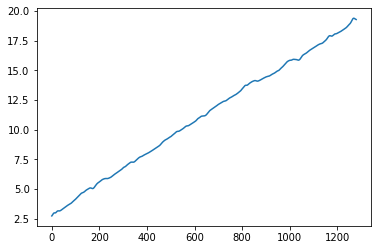

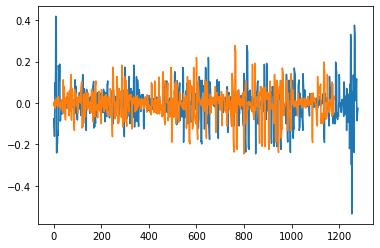

In [ ]:
from scipy.ndimage import gaussian_filter1d

z_250_filtered = gaussian_filter1d(z_250, 5, mode='nearest')

plt.plot(z_250_filtered)
plt.show()

z_processed = z_250 - z_250_filtered

z_processed2 = z_processed[50:-50]

plt.plot(z_processed)
plt.plot(z_processed2)
plt.show()

In [ ]:
Ra_250 = np.sum(np.abs(z_processed2))/z_processed2.size
print(np.std(np.abs(z_processed2)))
print(Ra_250)

0.048615101631216656
0.0495769005984409


In [ ]:
# Para sacar un perfil arbitrario de un arreglo
# from skimage.measure import profile_line
# profile_line(I, (45, 30), (160, 30))